# Data preprocessing

Data preprocessing comes after you've cleaned up your data and after you've done some exploratory analysis to understand your dataset. Once you understand your dataset, you'll probably have some idea about how you want to model your data. Machine learning models in Python require numerical input, so if your dataset has categorical variables, you'll need to transform them. Think of data preprocessing as a prerequisite for modeling.

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
warnings.filterwarnings('ignore')
# Read spreadsheet and assign it to swiss_loan
swiss_loan= pd.read_excel('C:/Users/rzouga/Desktop/ALLINHERE/Assignement/ATUCE_Case_study_data_2021.xlsx')

# How sparse is my data?

Most data sets contain missing values, often represented as NaN (Not a Number). If you are working with Pandas you can easily check how many missing values exist in each column.

In [2]:
swiss_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 87 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      688 non-null    int64  
 1   Pays                                    688 non-null    object 
 2   Taux                                    688 non-null    object 
 3   Mois                                    688 non-null    int64  
 4   Montant                                 688 non-null    object 
 5   Niveau de risque                        688 non-null    object 
 6   Emprunteur                              688 non-null    object 
 7   capital social                          688 non-null    object 
 8   année de création                       688 non-null    int64  
 9   Antériorité                             688 non-null    object 
 10  effectifs                               687 non-null    object

# Drop column that are unique  as they are unique identifiers for each loan and null columns:not useful for our model

In [3]:
swiss_loan.shape

(688, 87)

In [4]:
# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = swiss_loan.dropna()

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

(0, 87)


In [5]:
# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = swiss_loan.dropna(how='any', axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

(688, 10)


In [6]:
no_missing_values_cols.columns

Index(['ID', 'Pays', 'Taux', 'Mois', 'Montant', 'Niveau de risque',
       'Emprunteur', 'capital social', 'année de création', 'Antériorité'],
      dtype='object')

# Removing features with many missing values:40% missing values

In [7]:
# Create a boolean mask on whether each feature less than 40% missing values.
mask = swiss_loan.isna().sum() / len(swiss_loan) < 0.4
# Create a reduced dataset by applying the mask
reduced_df =swiss_loan.loc[:, mask]
print(swiss_loan.shape)
print(reduced_df.shape)

(688, 87)
(688, 21)


In [8]:
reduced_df.head()

,ID,Pays,Taux,Mois,Montant,Niveau de risque,Emprunteur,capital social,année de création,Antériorité,...,Nombre de mois de la période 16,Chiffre d'Affaires 16,EBE(retraité des loyers de leasing) 16,Resultat Net 16,Total Bilan 16,Capacité de remboursement (FCCR) 16,Fonds Propres 16,Fonds Propres / Total Bilan 16,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 16
0,755334684,France,"5,85 %",48,1 100 000 €,B,Ets Provost Frères,3 058 500 €,1962,1991,...,12,16801,0% - 5%,0 - 5 %,19756,"0,52",8480,"42,92 %","12,74*","125,88%"
1,666598628,Espagne,"5,50 %",48,310 000 €,B+,INTERNATIONAL STUDIES SA,396 072 €,1985,1998,...,12,1579,343,0 % - 5 %,1940,"0,23",751,"38,70%","0,47 *","21,51%"
2,528199436,Pays-Bas,"6,45 %",48,165 000 €,B,Docufiller Sales,900,2016,2016,...,12,514,50% - 55%,10 - 15 %,549,"8,94",10,"1,82 %","1,02*","2870,00%"
3,353279184,France,0.06,60,2 000 000 €,B,E.B.P.,10 000 €,2016,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,633690177,Italie,"4,90 %",36,100 000 €,B+,Deltagamma,10 000 €,2003,2003,...,12,790,56,0% - 5%,420477,"43,57",246,"58,62%","-0,99 *","-0,22"


In [9]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      688 non-null    int64 
 1   Pays                                    688 non-null    object
 2   Taux                                    688 non-null    object
 3   Mois                                    688 non-null    int64 
 4   Montant                                 688 non-null    object
 5   Niveau de risque                        688 non-null    object
 6   Emprunteur                              688 non-null    object
 7   capital social                          688 non-null    object
 8   année de création                       688 non-null    int64 
 9   Antériorité                             688 non-null    object
 10  effectifs                               687 non-null    object
 11  Nombre

In [10]:
# drop ID
reduced_df.drop('ID', axis=1, inplace=True)

In [11]:
reduced_df.shape

(688, 20)

# Explore Object columns 

In [12]:
reduced_df.columns

Index(['Pays', 'Taux', 'Mois', 'Montant', 'Niveau de risque', 'Emprunteur',
       'capital social', 'année de création', 'Antériorité', 'effectifs',
       'Nombre de mois de la période 16', 'Chiffre d'Affaires 16',
       'EBE(retraité des loyers de leasing) 16', 'Resultat Net 16',
       'Total Bilan 16', 'Capacité de remboursement (FCCR) 16',
       'Fonds Propres 16', 'Fonds Propres / Total Bilan 16',
       'Dettes Nettes / EBE(* années) 16', 'Dettes Nettes / Fonds propres 16'],
      dtype='object')

##  Clean column Pays 

In [13]:
reduced_df['Pays'].unique()

array(['France', 'Espagne', 'Pays-Bas', 'Italie', 'France\n',
       'Pays-Bas\n', ' Pays-Bas'], dtype=object)

In [14]:
reduced_df['Pays_corr']=reduced_df['Pays'].str.strip()

In [15]:
reduced_df['Pays_corr'].unique()

array(['France', 'Espagne', 'Pays-Bas', 'Italie'], dtype=object)

##  Clean column Taux

In [72]:
reduced_df['Taux']

0       5,85 %
1      5,50 % 
2       6,45 %
3         0.06
4       4,90 %
        ...   
683       0.08
684       0.07
685     9,50 %
686       0.07
687       0.09
Name: Taux, Length: 688, dtype: object

In [16]:
reduced_df['Taux'].unique()

array(['5,85 %', '5,50 % ', '6,45 %', 0.06, '4,90 %', '6,75 %', '5,95 %',
       '6,90 %', '7,10 %', '5,50 %', '4,25 %', '4,60 %', '4,70 %',
       '5,80 %', '5,75 %', '6,20 %', '4,85 %', '6,70 %', '6,05 %',
       '6,50 %', '5,05 %', '5,25 %', '5,60 %', '6,30 %', '4,65 %',
       '7,25 %', 0.05, '4,95 %', '5,90 %', '7,50 %', '6,40 %', '4,80 %',
       '4,50 %', '6,25 %', '2,50 %', '5,10 %', '6,60 %', '3,60 %',
       '5,40 %', '7,40 %', '6,10 %', '4,35 %', '5,20 %', '5,65 %',
       '6,80 %', '5,70 %', '4,75 %', '5,60 % ', '6,50 % ', '5,15 % ',
       '6,55 %', 0.09, '3,50 % ', '6,75 % ', '4,50 % ', '6,20 % ',
       '5,35 %', '3,90 %', '6,95 %', '7,05 %', '4,15 %', '7,15 %',
       '7,70 %', '3,25 %', 0.07, '7,20 %', '9,90 %', '5,45 %', '7,75 %',
       '6,65 %', '8,20 %', '7,55 %', '5,30 %', '4,20 %', '4,10 %',
       '3,40 %', '6,35 %', '3,10 %', '4,45 %', '3,45 %', '8,70 %', 0.04,
       '3,50 %', 0.08, '3,75 %', '8,50 %', '8,80 %', '8,75 %', '8,25 %',
       '6,99 %', '6,15 %', '

In [67]:
reduced_df['Taux_corr']=reduced_df['Taux'].str.replace('%','').str.strip().str.replace(',','.').str.extract(r'(\d+.\d+)')
reduced_df['Taux_corr'] = np.where(reduced_df['Taux_corr'].isnull(), 0.1, reduced_df['Taux_corr'])
reduced_df['Taux_corr'] = pd.to_numeric(reduced_df['Taux_corr'], errors='coerce')

In [68]:
reduced_df['Taux_corr'].unique()

array([5.85, 5.5 , 6.45, 0.1 , 4.9 , 6.75, 5.95, 6.9 , 7.1 , 4.25, 4.6 ,
       4.7 , 5.8 , 5.75, 6.2 , 4.85, 6.7 , 6.05, 6.5 , 5.05, 5.25, 5.6 ,
       6.3 , 4.65, 7.25, 4.95, 5.9 , 7.5 , 6.4 , 4.8 , 4.5 , 6.25, 2.5 ,
       5.1 , 6.6 , 3.6 , 5.4 , 7.4 , 6.1 , 4.35, 5.2 , 5.65, 6.8 , 5.7 ,
       4.75, 5.15, 6.55, 3.5 , 5.35, 3.9 , 6.95, 7.05, 4.15, 7.15, 7.7 ,
       3.25, 7.2 , 9.9 , 5.45, 7.75, 6.65, 8.2 , 7.55, 5.3 , 4.2 , 4.1 ,
       3.4 , 6.35, 3.1 , 4.45, 3.45, 8.7 , 3.75, 8.5 , 8.8 , 8.75, 8.25,
       6.99, 6.15, 8.1 , 9.5 ])

In [73]:
reduced_df['Taux_corr']

0      5.85
1      5.50
2      6.45
3      0.10
4      4.90
       ... 
683    0.10
684    0.10
685    9.50
686    0.10
687    0.10
Name: Taux_corr, Length: 688, dtype: float64

In [69]:
reduced_df['Taux_corr'].describe()

count    688.000000
mean       4.432616
std        2.790710
min        0.100000
25%        0.100000
50%        5.500000
75%        6.500000
max        9.900000
Name: Taux_corr, dtype: float64

# Binarizing column Taux for classification purpose 

In [70]:
# Import numpy
import numpy as np
# Specify the boundaries of the bins
bins = [0.01,5.5,  6.5, 10]
# Bin labels
labels = [ 'Low', 'Medium', 'High']
# Bin the continuous variable ConvertedSalary using these boundaries
reduced_df['Taux_corr_binned'] = pd.cut(reduced_df['Taux_corr'], 
                                         bins=bins,labels=labels )
# Print the first 5 rows of the boundary_binned column
print(reduced_df[['Taux_corr_binned', 'Taux_corr']].head())

  Taux_corr_binned  Taux_corr
0           Medium       5.85
1              Low       5.50
2           Medium       6.45
3              Low       0.10
4              Low       4.90


Low       390
Medium    158
High      140
Name: Taux_corr_binned, dtype: int64


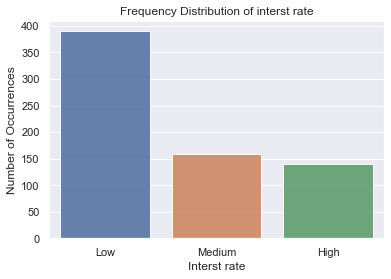

In [71]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# Create a series out of the Country column
Taux_binned = reduced_df['Taux_corr_binned']

# Get the counts of each category
Taux_counts = Taux_binned.value_counts()

# Print the count values for each category
print(Taux_counts)
sns.set(style="darkgrid")
sns.barplot(Taux_counts.index, Taux_counts.values, alpha=0.9)
plt.title('Frequency Distribution of interst rate')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interst rate', fontsize=12)
plt.show()


##  Clean column Montant

In [22]:
reduced_df['Montant'].unique()

array([' 1 100 000 €', '310 000 €', ' 165 000 €', '2 000 000 €',
       '100 000 €', '1 200 000 €', '1 015 000 €', '350 000 €',
       '500 000 €', ' 200 000 €', '90 000 €', '150 000 €', '35 000 €',
       '1 000 000 €', '83 000 €', '2 100 000 €', '210 000 €', '300 000 €',
       '110 000 €', '835 000 €', '207 533 €', '250 000 €', '41 500 €',
       '600 000 €', '32 000 €', '104 000 €', '207 500 €', '104 500 €',
       '1 250 000 €', '1 500 000 €', '400 000 €', '2 300 000 €',
       '156 000 €', '1 330 000 €', '1 560 000 €', '63 000 €', '450 000 €',
       '816 000 €', '625 000 €', '506 000 €', '619 000 €', '170 000 €',
       '43 000 €', '505 000 €', '320 000 €', '519 000 €', '410 000 €',
       '103 000 €', '42 000 €', '2 050 000 €', '60 000 €', '2 200 000 €',
       '50 000 €', '430 000 €', '830 000 €', '140 000 €', '30 000 €',
       '900 000 €', '311 000 €', '720 000 €', '230 000 €', '120 000 €',
       '72 500 €', '1 300 000 €', '493 000 €', '84 000 €', '874 000 €',
       '413 0

In [23]:
reduced_df['Montant_corr']=reduced_df['Montant'].str.replace('€','').str.replace('\xa0','').str.strip().str.replace('\s+','')
reduced_df['Montant_corr'] = np.where(reduced_df['Montant_corr'].isnull(), 0, reduced_df['Montant_corr'])
reduced_df['Montant_corr'] = pd.to_numeric(reduced_df['Montant_corr'], errors='coerce')

In [24]:
reduced_df['Montant_corr'].unique()

array([1100000,  310000,  165000, 2000000,  100000, 1200000, 1015000,
        350000,  500000,  200000,   90000,  150000,   35000, 1000000,
         83000, 2100000,  210000,  300000,  110000,  835000,  207533,
        250000,   41500,  600000,   32000,  104000,  207500,  104500,
       1250000, 1500000,  400000, 2300000,  156000, 1330000, 1560000,
         63000,  450000,  816000,  625000,  506000,  619000,  170000,
         43000,  505000,  320000,  519000,  410000,  103000,   42000,
       2050000,   60000, 2200000,   50000,  430000,  830000,  140000,
         30000,  900000,  311000,  720000,  230000,  120000,   72500,
       1300000,  493000,   84000,  874000,  413000,  123000,   48000,
        460000,  660000,  888000,   52000,  750000,  270000, 5000000,
       1550000, 2075000,   37000,   53000,  130000,  180000, 1700000,
        103093,  730000,   45000,  525000,  727000,  155000,  162000,
       1150000,  415000,  308000,  208000, 1050000,  623000, 3003000,
        384000, 1759

##  Clean column Niveau de risque

In [25]:
reduced_df['Niveau de risque'].unique()

array(['B', 'B+', 'C', 'A+', 'B\n', 'C\n', 'B+\n', 'A\n', 'A'],
      dtype=object)

In [26]:
reduced_df['Niveau_risque_corr']=reduced_df['Niveau de risque'].str.rstrip().str.replace('\s+','')

In [27]:
reduced_df['Niveau_risque_corr'].unique()

array(['B', 'B+', 'C', 'A+', 'A'], dtype=object)

##  Clean column Niveau de Emprunteur

In [28]:
reduced_df['Emprunteur'].value_counts().head(20)

Oracom                             5
Orchid Création                    5
Reworld Media                      5
Regourd Aviation                   3
Diffox - Diffusion Oyonnaxienne    3
AFC Promotion                      3
Inks                               3
A.M.S. Événements                  3
Saint Jean Industries              3
RetailIDF Ouest                    3
5àsec RIF                          3
Happy End Group                    3
Generys Groupe                     3
Foncière Patrimonia                3
Sirio                              3
Financière Guizot                  3
Capelli                            3
Euro Invest Group                  2
SGA Information Management SA      2
KPI                                2
Name: Emprunteur, dtype: int64

In [29]:

Emprunteurs = reduced_df['Emprunteur']


Emprunteurs_counts = Emprunteurs.value_counts()

# Create a mask for only categories that occur less than 5 times
mask = Emprunteurs.isin(Emprunteurs_counts[Emprunteurs_counts<5].index)

# Print the top 5 rows in the mask series
print(mask.head())

0    True
1    True
2    True
3    True
4    True
Name: Emprunteur, dtype: bool


In [30]:
Emprunteurs_counts[Emprunteurs_counts < 5].index

Index(['Regourd Aviation', 'Diffox - Diffusion Oyonnaxienne', 'AFC Promotion',
       'Inks', 'A.M.S. Événements', 'Saint Jean Industries', 'RetailIDF Ouest',
       '5àsec RIF', 'Happy End Group', 'Generys Groupe',
       ...
       'FB Carré Sénart', 'New Patientline', 'Allianz', 'Digital Progress',
       'Intercard', 'Impuls Spain', 'ALFAMETAL INTERNATIONAL BCN SL',
       'Findasense España SL\n', 'Deltisol', 'Opti-Mall'],
      dtype='object', length=593)

In [31]:
# Label all other categories as Other
reduced_df['Emprunteur'][mask] = 'Other'

# Print the updated category counts
reduced_df['Emprunteur'].value_counts()

Other              673
Reworld Media        5
Oracom               5
Orchid Création      5
Name: Emprunteur, dtype: int64

##  Clean column : capital social

In [32]:
reduced_df['capital social'].unique()

array(['3 058 500 €', '396 072 €', 900, '10 000 €', '2 372 808 €',
       '553 200 €', 1, '1 507 229 €\n', '25 000 €', '11 250 €',
       '19 000 €', '50 000 €', '30 000 €', '18 000 €', '10 000 €\n',
       '5 000 000 €', '1 000 000 €', '20 000 €', '534 000 €', '14 014 €',
       '692 000 €', '1 000 €', '100 000 €', '160 000 €', '12 000 €',
       '2 000 000 €', '2 556 935 €', '174 960 €', '4 300 000 €',
       '120 000 €', '16 927 999 €', '90 000 €', 100, '527 000 €',
       '72 000 €', '40 000 €', '500 000 €', '1 001 250 €', '36 060 €',
       '18 890 €', '1 128 444 €', '98 800 €', '136 000 €', '304 106 €',
       '38 219 €', '105 000 €', 85, '10 200 €', '8 500 €', '180 304 €',
       '387 247 €', '3 010 €', '17 609 000 €', '140 000 €', '150 000 €',
       '15 000 €', '11 120 €', '29 994 €', '25 822 €', '3 043 000 €',
       '665 000 €', '50 575 €', '3 986 663 €', '34 332 000 €', '54 000 €',
       '77 500 €', '3 137 424 €', '190 000 €', '50 800 €', '10 000 000 €',
       '150 250 €'

In [33]:
print("566\xa0500\xa0")

566 500 


In [34]:
reduced_df['capital_social_corr']=reduced_df['capital social'].str.replace('€','').str.replace('\xa0','').str.strip().str.replace('\s+','')
reduced_df['capital_social_corr'] = np.where(reduced_df['capital_social_corr'].isnull(), 0, reduced_df['capital_social_corr'])
reduced_df['capital_social_corr'] = pd.to_numeric(reduced_df['capital_social_corr'], errors='coerce')

In [35]:
reduced_df['capital_social_corr'].unique()

array([3.05850000e+06, 3.96072000e+05, 0.00000000e+00, 1.00000000e+04,
       2.37280800e+06, 5.53200000e+05, 1.50722900e+06, 2.50000000e+04,
       1.12500000e+04, 1.90000000e+04, 5.00000000e+04, 3.00000000e+04,
       1.80000000e+04, 5.00000000e+06, 1.00000000e+06, 2.00000000e+04,
       5.34000000e+05, 1.40140000e+04, 6.92000000e+05, 1.00000000e+03,
       1.00000000e+05, 1.60000000e+05, 1.20000000e+04, 2.00000000e+06,
       2.55693500e+06, 1.74960000e+05, 4.30000000e+06, 1.20000000e+05,
       1.69279990e+07, 9.00000000e+04, 5.27000000e+05, 7.20000000e+04,
       4.00000000e+04, 5.00000000e+05, 1.00125000e+06, 3.60600000e+04,
       1.88900000e+04, 1.12844400e+06, 9.88000000e+04, 1.36000000e+05,
       3.04106000e+05, 3.82190000e+04, 1.05000000e+05, 1.02000000e+04,
       8.50000000e+03, 1.80304000e+05, 3.87247000e+05, 3.01000000e+03,
       1.76090000e+07, 1.40000000e+05, 1.50000000e+05, 1.50000000e+04,
       1.11200000e+04, 2.99940000e+04, 2.58220000e+04, 3.04300000e+06,
      

In [36]:
reduced_df.columns

Index(['Pays', 'Taux', 'Mois', 'Montant', 'Niveau de risque', 'Emprunteur',
       'capital social', 'année de création', 'Antériorité', 'effectifs',
       'Nombre de mois de la période 16', 'Chiffre d'Affaires 16',
       'EBE(retraité des loyers de leasing) 16', 'Resultat Net 16',
       'Total Bilan 16', 'Capacité de remboursement (FCCR) 16',
       'Fonds Propres 16', 'Fonds Propres / Total Bilan 16',
       'Dettes Nettes / EBE(* années) 16', 'Dettes Nettes / Fonds propres 16',
       'Pays_corr', 'Taux_corr', 'Taux_corr_binned', 'Montant_corr',
       'Niveau_risque_corr', 'capital_social_corr'],
      dtype='object')

##  Clean column : effectifs

In [37]:
reduced_df['effectifs'].unique()

array(['11 à 50', '1 à 10', '51 à 250', nan, '11 à 50\n', 'Plus de 1 000',
       '251 à 1.000', '1 à 10\n', '51 à 250\n', '251 à 1.000\n',
       '251 à 1 000\n', '251 à 1 000', 'Plus de 1000', '-', '251 à 1000',
       'Plus de 600'], dtype=object)

In [38]:
reduced_df['Effectifse_corr']=reduced_df['effectifs'].str.rstrip().str.replace('\s+','')
reduced_df['Effectifse_corr'][reduced_df['Effectifse_corr'] == '-'] = np.nan

In [39]:
reduced_df['Effectifse_corr'].unique()

array(['11à50', '1à10', '51à250', nan, 'Plusde1000', '251à1.000',
       '251à1000', 'Plusde600'], dtype=object)

##  Clean column : Nombre de mois de la période 16

In [40]:
reduced_df['Nombre de mois de la période 16'].unique()

array([12, nan, '12 mois ', '12 mois', '16 mois', '7 mois', '6 mois',
       '15 mois', '9,5 mois', '23 mois', '22 mois', '11 mois', '-',
       '8 mois'], dtype=object)

In [41]:
reduced_df['Nombre_mois_période16_corr']=reduced_df['Nombre de mois de la période 16'].str.rstrip().str.replace('mois','').str.replace(',','.').str.replace('\s+','').str.extract(r"(\d+\.\d+|\d+)")
reduced_df['Nombre_mois_période16_corr'][reduced_df['Nombre_mois_période16_corr'] == '-'] = np.nan
reduced_df['Nombre_mois_période16_corr'] = pd.to_numeric(reduced_df['Nombre_mois_période16_corr'], errors='coerce')

In [42]:
reduced_df['Nombre_mois_période16_corr'].unique()

array([ nan, 12. , 16. ,  7. ,  6. , 15. ,  9.5, 23. , 22. , 11. ,  8. ])

##  Clean column : Chiffre d'Affaires 16

In [43]:
# 'Chiffre d'Affaires 16'
reduced_df.iloc[:,12].unique()

array(['0% - 5%', 343, '50% - 55%', nan, 56, 0, 1739, 1218, 262,
       '20% - 25%', 197, 149, '5% - 10%', '35% - 40%', '4 002', 317,
       '1 134', 251, '15% - 20%', '95% - 100%', -41, '10% - 15%', 244, 26,
       '1 799', '30% - 35%', 207, 430, '1 564', 201, '45% - 50%', 441,
       '2 078', 216, 756, -0.05, 2080, 175, 89, '2 453 000', 585, '1 037',
       '3 134', 373, '1 675', 778, 755, 1799, '25% - 30%', '9 563', 2180,
       '6 024', 164, -0.05000000000000002, 128, 40, '19 107', 4001,
       '5 339', '5% - 10% ', 469, 417, '25% - 30% ', 786, 204, 589, 162,
       '10% - 15% ', 3093, '15% - 20% ', '2 231 ', '20% - 25% ', 554,
       '30% - 35% ', '1 986 ', '1 548 ', 1.4999999999999998, '60% - 65%',
       '40% - 45%', '55% - 60%', -0.04999999999999999, '85% - 90%', 506,
       '70% - 75%', '20-25%', '10-15%', '15-20%', '25-30%', '5-10%',
       '0-5%', '35-40%', '30-35%', '40-50%', '40-45%', '05-10%', 6,
       '3 198', 375, 1120, 203, '4 060', 488, 494, '6 208', 105, '1 143',
  

In [44]:
reduced_df['Chiffre_Affaires_16_corr']=reduced_df.iloc[:,12].str.replace('\xa0','').str.strip().str.replace('\s+','')
reduced_df['Chiffre_Affaires_16_corr'] = pd.to_numeric(reduced_df['Chiffre_Affaires_16_corr'], errors='coerce')

In [45]:
reduced_df['Chiffre_Affaires_16_corr'].unique()

array([       nan, 4.0020e+03, 1.1340e+03, 1.7990e+03, 1.5640e+03,
       2.0780e+03, 2.4530e+06, 1.0370e+03, 3.1340e+03, 1.6750e+03,
       9.5630e+03, 6.0240e+03, 1.9107e+04, 5.3390e+03, 2.2310e+03,
       1.9860e+03, 1.5480e+03, 3.1980e+03, 4.0600e+03, 6.2080e+03,
       1.1430e+03, 9.3120e+03, 5.1910e+03, 2.2480e+03, 1.9990e+03,
       2.7690e+03, 6.6670e+03, 3.3320e+03, 2.9090e+03, 1.1730e+03,
       1.0396e+04, 1.2740e+03, 4.2470e+03, 7.5450e+03, 2.7729e+04,
       8.3880e+03, 1.9640e+03, 3.0930e+03, 1.1810e+03, 2.2063e+04,
       1.6170e+03, 1.3826e+04, 4.9930e+03, 1.1250e+03, 1.4450e+03,
       1.9310e+03, 2.0270e+03, 2.7220e+03, 4.9010e+03, 1.1310e+04,
       2.5610e+03])

##  Clean column : EBE(retraité des loyers de leasing) 16

In [46]:
reduced_df['EBE(retraité des loyers de leasing) 16'].unique()

array(['0% - 5%', 343, '50% - 55%', nan, 56, 0, 1739, 1218, 262,
       '20% - 25%', 197, 149, '5% - 10%', '35% - 40%', '4 002', 317,
       '1 134', 251, '15% - 20%', '95% - 100%', -41, '10% - 15%', 244, 26,
       '1 799', '30% - 35%', 207, 430, '1 564', 201, '45% - 50%', 441,
       '2 078', 216, 756, -0.05, 2080, 175, 89, '2 453 000', 585, '1 037',
       '3 134', 373, '1 675', 778, 755, 1799, '25% - 30%', '9 563', 2180,
       '6 024', 164, -0.05000000000000002, 128, 40, '19 107', 4001,
       '5 339', '5% - 10% ', 469, 417, '25% - 30% ', 786, 204, 589, 162,
       '10% - 15% ', 3093, '15% - 20% ', '2 231 ', '20% - 25% ', 554,
       '30% - 35% ', '1 986 ', '1 548 ', 1.4999999999999998, '60% - 65%',
       '40% - 45%', '55% - 60%', -0.04999999999999999, '85% - 90%', 506,
       '70% - 75%', '20-25%', '10-15%', '15-20%', '25-30%', '5-10%',
       '0-5%', '35-40%', '30-35%', '40-50%', '40-45%', '05-10%', 6,
       '3 198', 375, 1120, 203, '4 060', 488, 494, '6 208', 105, '1 143',
  

**==> this column will be eliminated , we need more domain expertise to keep it or not int the future**

# Column :Resultat Net 16

In [47]:
reduced_df['Resultat Net 16'].unique()

array(['0 - 5 %', '0 % - 5 %', '10 - 15 %', nan, '0% - 5%', '5 - 10 %',
       '5% - 10%', '0,0%', '30 - 35 %', '-3,59%', '35 - 40 %',
       '40% - 45%', '-9,74%', '25 - 30 %', '20 - 25 %', -0.14,
       '100 - 105 %', '10 % - 15 %', '-16,33%', '-0,3%', '-12,33%',
       '5 % - 10 %', '-1,5%', '-2,03%', '15 - 20 %', '-1,38%', '-1,0%',
       '-0,68%', '5 - 10 % ', '0% - 5% ', '-8,24% ', '0 - 5 % ',
       '0 % - 5% ', -507, '0 % - 5 % ', '-2,9% ', '-3,78%', '-16,25%',
       '-15,95%', '-38,08%', '-1,6%', '155 - 160 %', '-4,1%', 299,
       '-1,71%', '-0,19%', '-0,95%', '-8,3%', '10% - 15%', -0.0218,
       '5% - 10 %', '15% - 20 %', '0% - 5 %', '-4,81%', '10% - 15 %',
       -0.05, '-7,25%', '-5,81%', '-0,37%', '-5,16%', -0.0259, '10-15%',
       '5-10%', '0-5%', '30-35%', '-', '0-5 %', '5-10 %', '-6,76%',
       '0 - 5%', '15-20%', '-0,36%', '-8,76%', '-4,26%', '-2,06%',
       '-4,9%', '25% - 30%', '70% - 75%', '-11,29%', '15 694', 592, 444,
       '3 037', '15% - 20%', '-1,03', '-

**==> this column will be eliminated , we need more domain expertise to keep it or not int the future**

##  Clean column : Total Bilan 16

In [48]:
reduced_df['Total Bilan 16'].unique()

array([19756, 1940, 549, nan, 420477, 0, 11707, 183, 18264, '1 651', 662,
       1270, 1120773, 8323, 421, 11739138, 1493, 8845914, 8957, 1096, 663,
       428, 5060, 457, 222, '6491,48', 64744, 1017, 928, 370, 19606,
       161725, 255, 1219, 10272, 1397818, 307, 1011, 1164, 4084, 1268,
       2418, 458, 19, '21 196', 533, 3899, 399, '4 339', '28 765',
       '1 037', '3 562', 8149, 21383, 1481, '14 232', 2850, 74, '2 499',
       491, 2369, 641, '47 834 000', '2 962', '7 226', '20 372', 62, 3841,
       2147, '12 302', '7 502', 2265, 11584, 17033, 1784, 362, '49 033',
       27343, 131, '124 687', '3 586', 1745, 719, 3672, 683, 448, 23521,
       418, '2 081', 1134, '305 565', 38865, 729, 165, '28 809', 382,
       10707, 2663, 221, 3482748, 25721, 143, 236, 5474, 690, '6 263 ',
       1867, 30769, 23654, 33797, '27 925 ', 20173, 2083, 470, '30 108 ',
       '10 455 ', 874, 15906, 9341, 4591, '21447,1', 23493, 519, 2927,
       2014, 383, 125426, 7021, 1033, 309, 208, 1046, 4855, 348

In [49]:
import re 
s='-15  kh,th, 65.544 '
h= re.findall(r"([-+]?\d*\.*\d+|\d+)",s)
h

['-15', '65.544']

In [50]:
reduced_df['Total_Bilan_16_corr']= reduced_df['Total Bilan 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Total_Bilan_16_corr']= pd.to_numeric(reduced_df['Total_Bilan_16_corr'], errors='coerce')

In [51]:
reduced_df['Total_Bilan_16_corr'].unique()

array([        nan, 1.65100e+03, 6.49100e+03, 2.11960e+04, 4.33900e+03,
       2.87650e+04, 1.03700e+03, 3.56200e+03, 1.42320e+04, 2.49900e+03,
       4.78340e+07, 2.96200e+03, 7.22600e+03, 2.03720e+04, 1.23020e+04,
       7.50200e+03, 4.90330e+04, 1.24687e+05, 3.58600e+03, 2.08100e+03,
       3.05565e+05, 2.88090e+04, 6.26300e+03, 2.79250e+04, 3.01080e+04,
       1.04550e+04, 2.14470e+04, 1.18640e+04, 1.11100e+03, 1.55303e+05,
       1.66171e+05, 5.74320e+04, 4.26400e+03, 2.01400e+03, 5.10800e+04,
       1.70900e+03, 3.37970e+04, 1.25426e+05, 2.89000e+02, 9.79700e+03,
       6.17480e+04, 1.69000e+04, 1.56940e+04, 6.44100e+03, 2.55580e+04,
       1.27300e+03, 2.14600e+03, 4.73650e+04, 1.08100e+03, 1.17400e+03,
       3.79100e+03, 7.09200e+03, 4.62300e+03, 2.10700e+03, 6.27900e+03,
       7.77300e+03, 1.04900e+03, 4.55370e+04, 1.01193e+05, 1.15170e+04,
       1.03300e+03, 5.29640e+04, 5.90420e+04, 1.38220e+04, 3.91900e+03,
       3.30000e+03, 1.09110e+04, 1.61725e+05, 8.32100e+03, 3.649

##  Clean column : Capacité de remboursement (FCCR) 16

In [52]:
reduced_df['Capacité de remboursement (FCCR) 16'].unique()

array(['0,52', '0,23', '8,94', nan, '43,57', '1,1', 12, '1,18', '1,46',
       '1,65', '7,41', '1,07', 14.88, 8.33, '1,14', '3,89', '0,54', '0,7',
       '1,22', '1,55', '0,45', 97, '0,87', 5.7, '1,95', '1,16', '1,25',
       '13,83', 21, '2,44', '184,00', '5,08', '4,26', '38,50', '1,53',
       -1.31, '-1,92', '8,32', 256, '85,25', '-0,3', '4,2', '1,28',
       '1,15', '2,17', '1,06', '1,84', '1,3', '-5,16', '1,27', '23,14',
       '5,41', '0,65', -3, '5,61', '2,94', 3.13, '0,9', '1,94', '1,48',
       '1,62', '28,00', '5122,73', '1,30', '2,27', '27,21', '1,21',
       '30,5', '2,47', '3,3', '0,99', '1,29', 72, '0,85', '6,43', '-2,50',
       '4,08', '14,61', '1,70', '10,5', '0,8', 30, '0,95', '1,81', '2,28',
       '9,00', '1,13', '2,34', '-5,9', '2,26', '5,24', '7,54 ', '0,43',
       '3,14 ', '1,47', '4,55', '2,24 ', '0,84 ', '9,51', '0,15 ', '1,24',
       '0,9 ', '2,86 ', '2,22', '1,33 ', '3,80 ', '26,02 ', '8,88',
       '5,39', '3,05', '1,19', '4,38', '1,76', '3,65', '5,69', '-

In [53]:
reduced_df['Capacité_remboursement_FCCR_16_corr']= reduced_df['Capacité de remboursement (FCCR) 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Capacité_remboursement_FCCR_16_corr']= pd.to_numeric(reduced_df['Capacité_remboursement_FCCR_16_corr'], errors='coerce')

In [54]:
reduced_df['Capacité_remboursement_FCCR_16_corr'].unique()

array([ 5.20000e-01,  2.30000e-01,  8.94000e+00,          nan,
        4.35700e+01,  1.10000e+00,  1.18000e+00,  1.46000e+00,
        1.65000e+00,  7.41000e+00,  1.07000e+00,  1.14000e+00,
        3.89000e+00,  5.40000e-01,  7.00000e-01,  1.22000e+00,
        1.55000e+00,  4.50000e-01,  8.70000e-01,  1.95000e+00,
        1.16000e+00,  1.25000e+00,  1.38300e+01,  2.44000e+00,
        1.84000e+02,  5.08000e+00,  4.26000e+00,  3.85000e+01,
        1.53000e+00, -1.92000e+00,  8.32000e+00,  8.52500e+01,
       -3.00000e-01,  4.20000e+00,  1.28000e+00,  1.15000e+00,
        2.17000e+00,  1.06000e+00,  1.84000e+00,  1.30000e+00,
       -5.16000e+00,  1.27000e+00,  2.31400e+01,  5.41000e+00,
        6.50000e-01,  5.61000e+00,  2.94000e+00,  9.00000e-01,
        1.94000e+00,  1.48000e+00,  1.62000e+00,  2.80000e+01,
        5.12273e+03,  2.27000e+00,  2.72100e+01,  1.21000e+00,
        3.05000e+01,  2.47000e+00,  3.30000e+00,  9.90000e-01,
        1.29000e+00,  8.50000e-01,  6.43000e+00, -2.500

##  Clean column : Fonds Propres 16

In [55]:
reduced_df['Fonds Propres 16'].unique()

array([8480, 751, 10, nan, 246, 0, 1824, 45, 7119, 419, 191, 414, 318,
       2276, 227, '3 331', -35, 517, 1003, -38, 234, 36, 4609, 84, 114,
       '4 378', 8968, 1474, 22, 121, '6 218', 59126, 90, 932, 1270, 107,
       250, 262, 3722, 790, 637, 310, -64, '11 164', 210, 1682, 80, 719,
       '3 067', 387, 939, -251, 10687, 545, 6604, 458, -9, 557, 255, 429,
       223, 79, '6 634 000', 272, 749, '5 022', 13, 2568, 974, '1 449',
       901, 139, '1 872', 4350, 461, 91, '17 326', 10319, '47 649', 212,
       446, -625, '1 349', 108, 180, 1799, 75, 807, 582, '106 104', 14356,
       187, 60, '5 320', 140, 3563, 1857, 48, 509, 8779, 57, 33, 466, 87,
       947, -912, 11719, 4069, '2 292 ', 6631, 152, 124, '8 999 ',
       '1 824 ', 251, 7285, 338, 425, '18575,4', 6059, 104, 1912, 1567,
       '-22,4', 10314, 678, -171, 285, 101, 498, 999, 675, 111, 128, 1083,
       8545, 51, 256, 405, 106, 62, 2246, 231, 1903, 12148, 354, 705,
       21019, '499*', 86, 3002, -484, '7365,8', 69728, 2434

In [56]:
reduced_df['Fonds_Propres_16_corr']= reduced_df['Fonds Propres 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Fonds_Propres_16_corr']= pd.to_numeric(reduced_df['Fonds_Propres_16_corr'], errors='coerce')

In [57]:
reduced_df['Fonds_Propres_16_corr'].unique()

array([         nan,  3.33100e+03,  4.37800e+03,  6.21800e+03,
        1.11640e+04,  3.06700e+03,  6.63400e+06,  5.02200e+03,
        1.44900e+03,  1.87200e+03,  1.73260e+04,  4.76490e+04,
        1.34900e+03,  1.06104e+05,  5.32000e+03,  2.29200e+03,
        8.99900e+03,  1.82400e+03,  1.85754e+04, -2.24000e+01,
        4.99000e+02,  7.36580e+03,  5.92500e+03,  5.42590e+04,
        2.27600e+04,  1.77090e+04,  2.12100e+03,  1.56700e+03,
        1.60820e+04,  7.15700e+03,  1.03140e+04,  1.00100e+03,
        1.06110e+04,  1.74300e+03,  6.78900e+03,  3.19000e+03,
        1.67860e+04,  1.27100e+03,  2.10110e+04,  1.25200e+03,
        1.99300e+03,  1.15000e+03,  1.16000e+03,  2.45100e+03,
        4.08600e+03,  8.54500e+03,  2.94840e+04,  2.57100e+03,
        1.16510e+04,  1.69250e+04,  6.42700e+03,  2.03700e+03,
        4.24700e+03,  5.91260e+04,  1.28810e+04,  2.08800e+03,
        1.27280e+04,  1.47400e+03,  2.05000e+03,  1.24900e+03,
        1.38330e+04,  3.24100e+03,  1.06600e+03,  1.562

##  Clean column :Fonds Propres / Total Bilan 16

In [58]:
reduced_df['Fonds Propres / Total Bilan 16'].unique()

array(['42,92 %', '38,70%', '1,82 %', nan, '58,62%', '15,58%', '24,59 %',
       '38,98%', '25,37%', '28,85 %', '32,59%', '28,34%', 0.2735, 0.5392,
       '28,38%', '-2,34%', '5,85%', '11,19%', '-3,47 %', '35,29 %',
       '8,41 %', '91,09 %', '18,38 %', 0.5135, '67,44%', '13,85 %',
       '39,46 %', '2,37%', '32,70%', '31,71%', '36,56 %', 0.7646,
       '12,36 %', '7,68%', '29,32 %', '24,73 %', 0.2251, '91,14 %',
       '62,31%', 0.2634, '67,69 %', '-336,84 %', '52,67%', '39,43%',
       '43,14 %', '20,05 %', '16,57%', '10,66%', '37,30%', '26,36%',
       '-3,08 %', '49,98%', '36,8 %', '47,78 %', '16,07 %', '-12,16 %',
       '22,31%', '51,93 %', '18,11%', 0.3479, '13,87%', '9,19%', '10,37%',
       '24,65%', '20,97 %', '66,86 %', '45,36%', '11,78%', '12,01%',
       '6,14 %', '16,16%', '25,54%', '25,84 %', 362, '35,34%', '37,74%',
       '60,31 %', '38,21%', '5,90%', 0.2556, '-86,93 %', '36,74%',
       '15,78%', '40,18 %', '7,65 %', '17,94 %', '38,78%', '14,52 %',
       '34,72%', '

In [59]:
reduced_df['Fonds_Propres_Total_Bilan_corr']= reduced_df['Fonds Propres / Total Bilan 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.replace('%','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Fonds_Propres_Total_Bilan_corr']= pd.to_numeric(reduced_df['Fonds_Propres_Total_Bilan_corr'], errors='coerce')

In [60]:
reduced_df['Fonds_Propres_Total_Bilan_corr'].unique()

array([ 4.2920e+01,  3.8700e+01,  1.8200e+00,         nan,  5.8620e+01,
        1.5580e+01,  2.4590e+01,  3.8980e+01,  2.5370e+01,  2.8850e+01,
        3.2590e+01,  2.8340e+01,  2.8380e+01, -2.3400e+00,  5.8500e+00,
        1.1190e+01, -3.4700e+00,  3.5290e+01,  8.4100e+00,  9.1090e+01,
        1.8380e+01,  6.7440e+01,  1.3850e+01,  3.9460e+01,  2.3700e+00,
        3.2700e+01,  3.1710e+01,  3.6560e+01,  1.2360e+01,  7.6800e+00,
        2.9320e+01,  2.4730e+01,  9.1140e+01,  6.2310e+01,  6.7690e+01,
       -3.3684e+02,  5.2670e+01,  3.9430e+01,  4.3140e+01,  2.0050e+01,
        1.6570e+01,  1.0660e+01,  3.7300e+01,  2.6360e+01, -3.0800e+00,
        4.9980e+01,  3.6800e+01,  4.7780e+01,  1.6070e+01, -1.2160e+01,
        2.2310e+01,  5.1930e+01,  1.8110e+01,  1.3870e+01,  9.1900e+00,
        1.0370e+01,  2.4650e+01,  2.0970e+01,  6.6860e+01,  4.5360e+01,
        1.1780e+01,  1.2010e+01,  6.1400e+00,  1.6160e+01,  2.5540e+01,
        2.5840e+01,  3.5340e+01,  3.7740e+01,  6.0310e+01,  3.82

## Clean column :Dettes Nettes / EBE(* années) 16

In [61]:
reduced_df['Dettes Nettes / EBE(* années) 16'].unique()

array(['12,74*', '0,47 *', '1,02*', nan, '-0,99 *', '4,78 *', '1,89*',
       '7,34 *', '3,06 *', '0,70*', '-0,44 *', '-0,35 *', '001*',
       '2,36 *', '1,97 *', '11,24 *', '12,61 *', '1,08*', '1,40*',
       '1,35*', '1,18*', '5,60*', '0,30*', '-5,61 *', '0,91*', '0,69*',
       '-0,53 *', '-2,54 *', '3,61 *', '4,78*', '0,51*', '-1.16*',
       '2,20*', '2,28 *', '-5,74*', '1,15*', 0.8924, '3,70*', '-0,77 *',
       '-1%*', '-0,11*', '0,76 *', '1,37 *', '-0,45*', '1,81*', '1,94 *',
       '5,78 *', '1,83 *', '2,45 *', '-2,05*', '4,16 *', '-0,53*',
       '2,35*', '-0,02*', '17,33*', '3,74 *', '-0,44*', '13,40 *',
       '86,54%', '3,76*', '2,04 *', '4,05 *', '4,72 *', '-0,17*', '2,44*',
       '-2,17 *', '3,02 *', '0,26*', '8,31 *', '-2,16 *', '2,06*',
       '0,35*', '2,25 *', '3,30 *', '-1,34*', '4,32 *', '-5,06 *',
       '-003*', '7,09*', '-1,25 *', '3,59 *', '-0,47*', '0,78*',
       '23,15 *', '4,55 *', '3,66 *', '0,65*', '0,93*', '2,15 *', '1,24*',
       '1,27*', '-0,13*', '

In [62]:
reduced_df['Dettes_Nettes_EBE_16_corr']= reduced_df['Dettes Nettes / EBE(* années) 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.replace('*','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Dettes_Nettes_EBE_16_corr']= pd.to_numeric(reduced_df['Dettes_Nettes_EBE_16_corr'], errors='coerce')

In [63]:
reduced_df['Dettes_Nettes_EBE_16_corr'].unique()

array([ 1.2740e+01,  4.7000e-01,  1.0200e+00,         nan, -9.9000e-01,
        4.7800e+00,  1.8900e+00,  7.3400e+00,  3.0600e+00,  7.0000e-01,
       -4.4000e-01, -3.5000e-01,  1.0000e+00,  2.3600e+00,  1.9700e+00,
        1.1240e+01,  1.2610e+01,  1.0800e+00,  1.4000e+00,  1.3500e+00,
        1.1800e+00,  5.6000e+00,  3.0000e-01, -5.6100e+00,  9.1000e-01,
        6.9000e-01, -5.3000e-01, -2.5400e+00,  3.6100e+00,  5.1000e-01,
       -1.1600e+00,  2.2000e+00,  2.2800e+00, -5.7400e+00,  1.1500e+00,
        3.7000e+00, -7.7000e-01, -1.0000e+00, -1.1000e-01,  7.6000e-01,
        1.3700e+00, -4.5000e-01,  1.8100e+00,  1.9400e+00,  5.7800e+00,
        1.8300e+00,  2.4500e+00, -2.0500e+00,  4.1600e+00,  2.3500e+00,
       -2.0000e-02,  1.7330e+01,  3.7400e+00,  1.3400e+01,  8.6540e+01,
        3.7600e+00,  2.0400e+00,  4.0500e+00,  4.7200e+00, -1.7000e-01,
        2.4400e+00, -2.1700e+00,  3.0200e+00,  2.6000e-01,  8.3100e+00,
       -2.1600e+00,  2.0600e+00,  3.5000e-01,  2.2500e+00,  3.30

## Clean column :Dettes Nettes / EBE(* années) 16

In [64]:
reduced_df['Dettes Nettes / Fonds propres 16'].unique()

array(['125,88%', '21,51%', '2870,00%', nan, '-0,22', '455,51%', '75,56%',
       '125,69%', '1,92', '63,35%', '-21,19%', -0.17, 0.39, 0.46, 2.84,
       '-17,86', 8.38, '315,46%', '-1232,89%', '123,61%', '250,47%',
       '91,09 %', '526,49%', 0.5135, 0.05, '120,92%', '49,90%', -5.91,
       '-0,55', 1.04, '38,12%', '21,94%', -0.6, '284,25%', '4,39',
       '-293,33%', '193,20%', 0.76, '-7,95%', '-41,81%', -1.91, '-20,97%',
       '-54,69%', 0.0026, '0,11', 1.31, '-15,83%', '278,75%', 1.19,
       '3,91', 1.02, '1,97', '-472,91%', '81,02%', '-38,90%', '80,71%',
       '-3,82%', '577,78%', 1.17, '-62,35%', '277,12%', 0.2, '1,39', 4.39,
       5.6, 2.95, '-161,54%', '24,08%', '-82,93%', 3.49, 0.66, '94,96%',
       3.35, '-89,20%', '92,41%', '41,48%', 1.24, '69,64%', '-141,77%',
       0.55, -3.93, 1.01, '-175,84%', -0.54, 4.27, '-67,78%', '320,01%',
       '192,67%', '1,15', '66,24%', '0,82', '102,03%', '91,04%', '61,67%',
       2.16, '182,34%', '78,28%', '26,49%', '-27,08% ', -0.27, 

In [65]:
reduced_df['DettesNettes_Fonds_propres_16_corr']= reduced_df['Dettes Nettes / Fonds propres 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.replace('%','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['DettesNettes_Fonds_propres_16_corr']= pd.to_numeric(reduced_df['DettesNettes_Fonds_propres_16_corr'], errors='coerce')

In [66]:
reduced_df['DettesNettes_Fonds_propres_16_corr'].unique()

array([ 1.25880e+02,  2.15100e+01,  2.87000e+03,          nan,
       -2.20000e-01,  4.55510e+02,  7.55600e+01,  1.25690e+02,
        1.92000e+00,  6.33500e+01, -2.11900e+01, -1.78600e+01,
        3.15460e+02, -1.23289e+03,  1.23610e+02,  2.50470e+02,
        9.10900e+01,  5.26490e+02,  1.20920e+02,  4.99000e+01,
       -5.50000e-01,  3.81200e+01,  2.19400e+01,  2.84250e+02,
        4.39000e+00, -2.93330e+02,  1.93200e+02, -7.95000e+00,
       -4.18100e+01, -2.09700e+01, -5.46900e+01,  1.10000e-01,
       -1.58300e+01,  2.78750e+02,  3.91000e+00,  1.97000e+00,
       -4.72910e+02,  8.10200e+01, -3.89000e+01,  8.07100e+01,
       -3.82000e+00,  5.77780e+02, -6.23500e+01,  2.77120e+02,
        1.39000e+00, -1.61540e+02,  2.40800e+01, -8.29300e+01,
        9.49600e+01, -8.92000e+01,  9.24100e+01,  4.14800e+01,
        6.96400e+01, -1.41770e+02, -1.75840e+02, -6.77800e+01,
        3.20010e+02,  1.92670e+02,  1.15000e+00,  6.62400e+01,
        8.20000e-01,  1.02030e+02,  9.10400e+01,  6.167